## Random Forrest

In [1]:
import numpy as np
import pandas as pd

### Importing the dataset and creating the train and test sets

In [2]:
dataset= pd.read_csv("Data.csv")
X=dataset.iloc[:,1:-1].values
y= dataset.iloc[:,-1].values

In [3]:
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [4]:
print(y)

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 

In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

### Applying Grid Search + K-Fold Cross Valdiation to find the best model hyper-parameters

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the Grid of parameters to test
grid = {'n_estimators' : [ 10,20 ,30 ,40 ,50 ,60 ,70 ,80 ,90 ,100],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state':[0]}

gs= GridSearchCV(estimator= RandomForestClassifier(), param_grid=grid, scoring='accuracy',cv=10,n_jobs=-1)
gs.fit(X_train,y_train)
# Get the best accuracy  using the best_score_ attribute of the grid search obj
best_accuracy= gs.best_score_
# Get the best parameters corresponding to this accuracy
best_parameters=gs.best_params_

print("Best Accuracy:", best_accuracy) 
print("Best Parameters:", best_parameters )


Best Accuracy: 0.9743097643097643
Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 20, 'random_state': 0}


### Applying Random Search + K-Fold Cross Valdiation to find the best model hyper-parameters

In [7]:
from sklearn.model_selection import RandomizedSearchCV


param = {'n_estimators' : [ int(x) for x in (np.linspace(start = 10, stop = 200, num = 20))],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : [int(x) for x in np.linspace(start = 2, stop = 20, num = 10)],
    'criterion': ['gini', 'entropy'],
    'random_state':[0]}

rs= RandomizedSearchCV(estimator= RandomForestClassifier(), param_distributions=param, n_iter=50, random_state=0, scoring='accuracy',cv=10,n_jobs=-1)
rs.fit(X_train,y_train)
# Get the best accuracy  using the best_score_ attribute of the grid search obj
best_accuracy= rs.best_score_
# Get the best parameters corresponding to this accuracy
best_parameters=rs.best_params_

print("Best Accuracy:", best_accuracy) 
print("Best Parameters:", best_parameters )

Best Accuracy: 0.9706734006734008
Best Parameters: {'random_state': 0, 'n_estimators': 160, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini'}


### Fit the model using the best found *hyperparameters* 

In [8]:
model= RandomForestClassifier(criterion='entropy', max_depth = 4, max_features='sqrt', n_estimators= 20, random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       n_estimators=20, random_state=0)

### Evaluate The Model

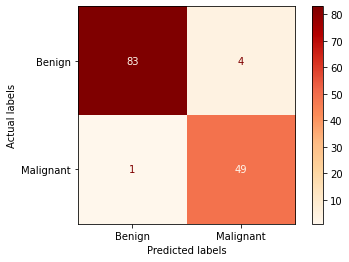

Accuracy :  0.9635036496350365
Recall :  0.98
Precision:  0.9245283018867925
F1-score:  0.9514563106796116
AUC:  0.9942528735632183


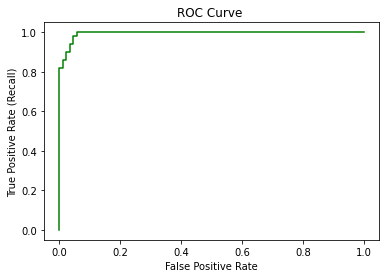

In [9]:
from sklearn.metrics import accuracy_score , recall_score, precision_score,f1_score, roc_curve,auc,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the X_test
y_pred=model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=["Benign","Malignant"])
disp.plot(cmap=plt.cm.OrRd)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

# Caluclate the performance metrics
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred,pos_label=4))
print("Precision: ", precision_score(y_test, y_pred,pos_label=4))
print("F1-score: ", f1_score(y_test, y_pred,pos_label=4))
# Plotting the ROC curve and calculating the AUC
# get false and true positive rates
y_pred_prob=model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1], pos_label=4)
# get area under the curve
roc_auc = auc(fpr, tpr)
print ("AUC: ",roc_auc)
# plot ROC curve
plt.plot(fpr, tpr, color='green')
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

In [10]:
# Confirming the results from the confusion matrix
accuracy=(83+49)/(83+49+4+1)
recall= (49)/(49+1)
precision = (49)/(49+4)
print("Accuracy : ", accuracy )
print("Recall : ",recall)
print("Precision: ", precision)
print("F1-score: ", 2*(precision*recall/(precision+recall)))

Accuracy :  0.9635036496350365
Recall :  0.98
Precision:  0.9245283018867925
F1-score:  0.9514563106796116


In [11]:
model.classes_

array([2, 4])

In [12]:
model.predict(X_test)

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2])

In [13]:
model.predict_proba(X_test)

array([[9.74733536e-01, 2.52664640e-02],
       [9.99497804e-01, 5.02196024e-04],
       [1.07994822e-01, 8.92005178e-01],
       [7.03422243e-02, 9.29657776e-01],
       [9.99497804e-01, 5.02196024e-04],
       [9.57287252e-01, 4.27127478e-02],
       [9.65620586e-01, 3.43794144e-02],
       [2.62754041e-02, 9.73724596e-01],
       [9.40291455e-01, 5.97085452e-02],
       [9.99497804e-01, 5.02196024e-04],
       [1.51928286e-02, 9.84807171e-01],
       [9.99497804e-01, 5.02196024e-04],
       [2.56874288e-03, 9.97431257e-01],
       [9.99497804e-01, 5.02196024e-04],
       [9.97043651e-01, 2.95634921e-03],
       [5.93110719e-01, 4.06889281e-01],
       [1.36816214e-02, 9.86318379e-01],
       [6.97740425e-02, 9.30225958e-01],
       [3.55862033e-02, 9.64413797e-01],
       [9.96880252e-01, 3.11974790e-03],
       [9.99497804e-01, 5.02196024e-04],
       [9.99497804e-01, 5.02196024e-04],
       [1.78388555e-01, 8.21611445e-01],
       [9.99497804e-01, 5.02196024e-04],
       [4.655874

In [14]:
y_pro=model.predict_proba(X_test)
y_pro[:,1]

array([2.52664640e-02, 5.02196024e-04, 8.92005178e-01, 9.29657776e-01,
       5.02196024e-04, 4.27127478e-02, 3.43794144e-02, 9.73724596e-01,
       5.97085452e-02, 5.02196024e-04, 9.84807171e-01, 5.02196024e-04,
       9.97431257e-01, 5.02196024e-04, 2.95634921e-03, 4.06889281e-01,
       9.86318379e-01, 9.30225958e-01, 9.64413797e-01, 3.11974790e-03,
       5.02196024e-04, 5.02196024e-04, 8.21611445e-01, 5.02196024e-04,
       9.53441258e-01, 9.76776868e-01, 3.43794144e-02, 5.02196024e-04,
       5.02196024e-04, 9.53848467e-01, 5.02196024e-04, 9.84807171e-01,
       9.97882231e-01, 5.02196024e-04, 5.02196024e-04, 5.02196024e-04,
       9.85709578e-01, 9.07814634e-01, 5.02196024e-04, 8.87726230e-01,
       3.72800248e-03, 1.14291879e-01, 1.55727554e-02, 5.02196024e-04,
       5.02196024e-04, 3.72800248e-03, 4.09156718e-03, 9.97431257e-01,
       3.27997380e-03, 5.02196024e-04, 9.31039468e-01, 4.09156718e-03,
       9.26057743e-01, 5.02196024e-04, 3.11974790e-03, 1.52664640e-02,
      